# Bitcoin Exploratory Data Analysis

Dataset availabe at https://www.kaggle.com/datasets/jkraak/bitcoin-price-dataset/data

Import necessary libraries

In [54]:
import pandas as pd
from matplotlib import pyplot as plt
import mplfinance as mpf
import numpy as np
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


View the data

In [230]:
df = pd.read_csv('bitcoin_2017_to_2023.csv')
df.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.68658,1.354538e+05,258,0.89391,25836.224836
1,2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.77589,1.380351e+05,317,2.24546,64899.385195
2,2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.52263,3.330532e+05,451,2.70873,78290.170121
3,2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53,15.89610,4.595556e+05,483,10.22981,295738.166916
4,2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41,37.74657,1.090761e+06,686,16.50452,476955.246611


In [121]:
len(df)

3126000

In [122]:
df.tail()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
3125995,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,599.999338,1,0.140796,599.999338
3125996,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,51.171852,3,0.012008,51.171852
3125997,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1117.542921,2,0.261074,1117.542921
3125998,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000,0,0.000000,0.000000
3125999,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,7564.906851,3,0.075183,320.390851


In [123]:
df.dtypes

timestamp                        object
open                            float64
high                            float64
low                             float64
close                           float64
volume                          float64
quote_asset_volume              float64
number_of_trades                  int64
taker_buy_base_asset_volume     float64
taker_buy_quote_asset_volume    float64
dtype: object

In [231]:
import datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [232]:
df =df.sort_values(by='timestamp', ascending=True)

In [126]:
df.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
3125999,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,7564.906851,3,0.075183,320.390851
3125998,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000,0,0.000000,0.000000
3125997,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1117.542921,2,0.261074,1117.542921
3125996,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,51.171852,3,0.012008,51.171852
3125995,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,599.999338,1,0.140796,599.999338


In [233]:
df = df.set_index('timestamp')

In [63]:
df.head()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
timestamp,,,,,,,,,
2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,7564.906851,3,0.075183,320.390851
2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000,0,0.000000,0.000000
2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1117.542921,2,0.261074,1117.542921
2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,51.171852,3,0.012008,51.171852
2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,599.999338,1,0.140796,599.999338


In [64]:
df['2017-08-19 00:00:00':'2017-08-19 23:59:00']

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
timestamp,,,,,,,,,
2017-08-19 00:00:00,4108.37,4108.37,4108.37,4108.37,0.711854,2924.559618,5,0.711854,2924.559618
2017-08-19 00:01:00,4108.37,4108.37,4106.44,4106.44,0.317270,1303.323443,6,0.289158,1187.828946
2017-08-19 00:02:00,4106.44,4106.44,4106.44,4106.44,0.000000,0.000000,0,0.000000,0.000000
2017-08-19 00:03:00,4106.44,4106.44,4106.44,4106.44,0.798665,3279.669903,4,0.709813,2914.804496
2017-08-19 00:04:00,4106.44,4106.44,4106.44,4106.44,0.000000,0.000000,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
2017-08-19 23:55:00,4139.98,4139.98,4139.98,4139.98,0.000000,0.000000,0,0.000000,0.000000
2017-08-19 23:56:00,4139.98,4139.98,4139.98,4139.98,0.000000,0.000000,0,0.000000,0.000000
2017-08-19 23:57:00,4139.98,4139.98,4139.98,4139.98,0.000000,0.000000,0,0.000000,0.000000


In [100]:
summary = df.describe()
summary = summary.astype(int)
summary

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
count,3126000,3126000,3126000,3126000,3126000,3126000,3126000,3126000,3126000
mean,20089,20101,20076,20089,52,1155881,1018,25,572720
std,16058,16069,16048,16058,97,2335868,1817,49,1193135
min,2830,2830,2817,2817,0,0,0,0,0
25%,7624,7629,7620,7624,11,112233,150,5,51250
50%,11699,11706,11692,11700,23,370646,413,11,175369
75%,29899,29907,29890,29899,53,1276762,1026,26,621024
max,69000,69000,68786,69000,5877,145955668,107315,3537,89475505


In [65]:
help(mpf.plot)

Help on function plot in module mplfinance.plotting:

plot(data, **kwargs)
    Given a Pandas DataFrame containing columns Open,High,Low,Close and optionally Volume
    with a DatetimeIndex, plot the data.
    Available plots include ohlc bars, candlestick, and line plots.
    Also provide visually analysis in the form of common technical studies, such as:
    moving averages, renko, etc.
    Also provide ability to plot trading signals, and/or addtional user-defined data.



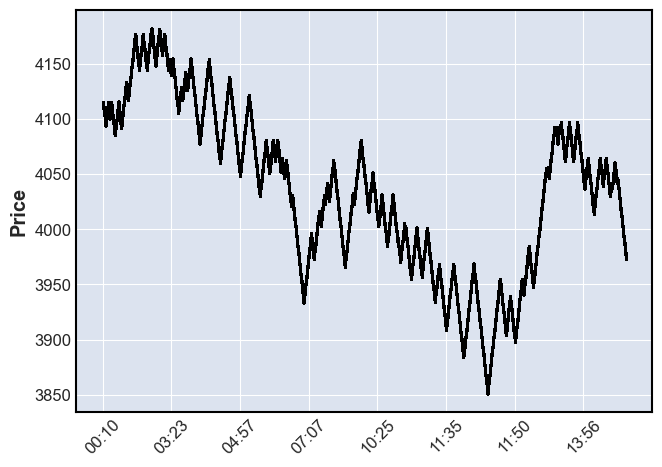

In [119]:
mpf.plot(df['2017-08-19 00:09:30':'2017-08-19 16:00:00'], type='renko')

Text(0.5, 1.0, 'Volume vs Time')

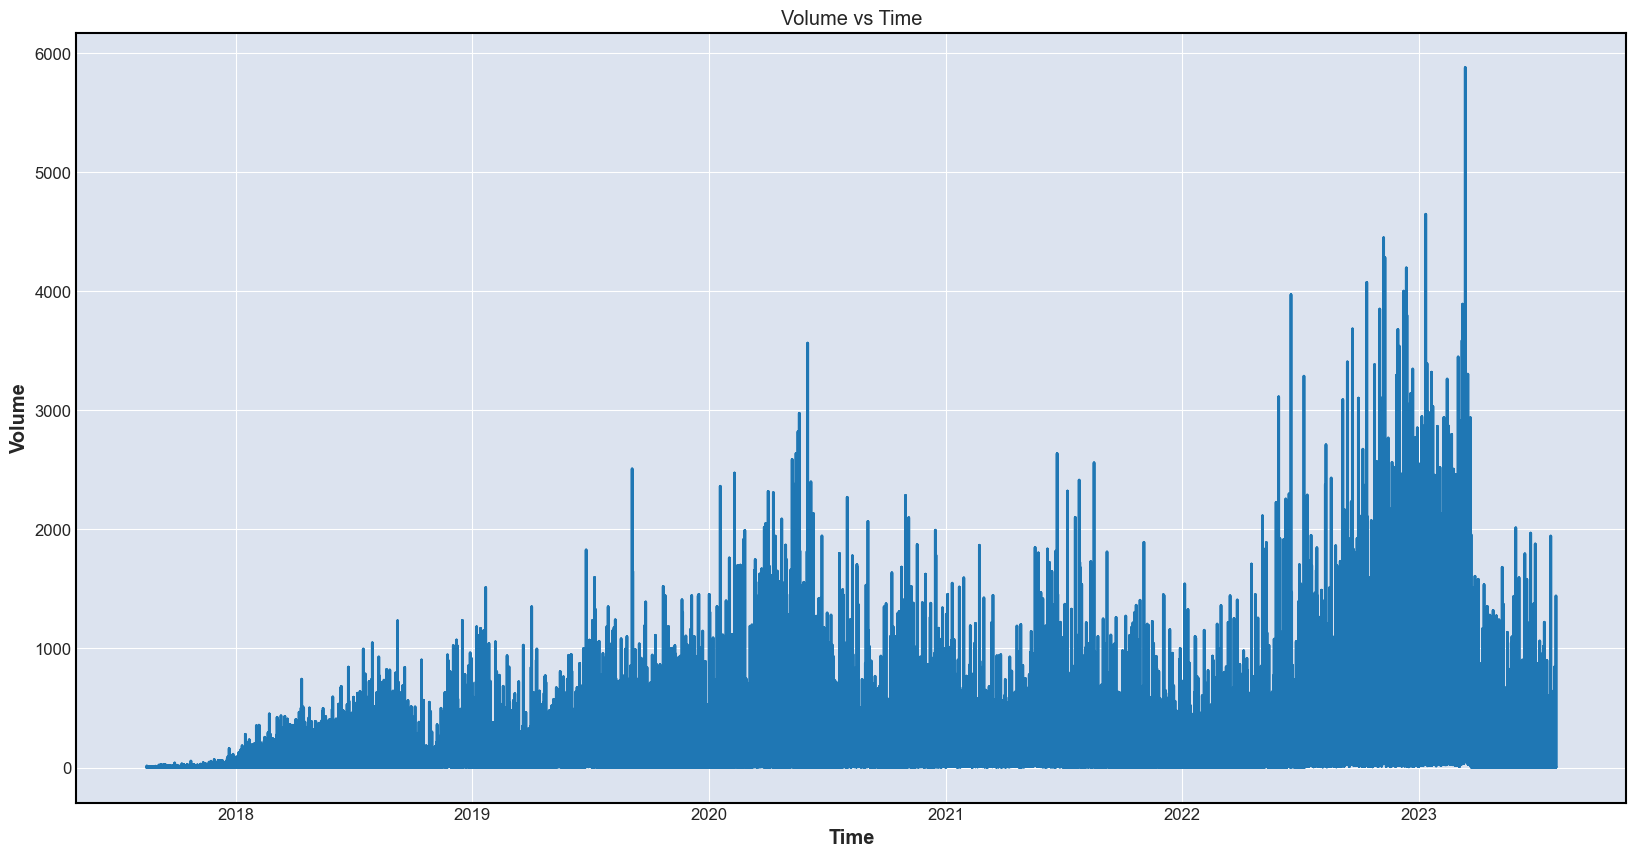

In [ ]:
#plot volume vs time
plt.figure(figsize=(20,10))
plt.plot(df['date'], df['volume'])
plt.xlabel('Time')
plt.ylabel('Volume')
plt.title('Volume over time')


In [1]:
fig,ax=plt.subplots(1,1,figsize=(10,6))
sns.heatmap(df.corr(),annot=True,linewidths=1)
plt.show()

NameError: name 'plt' is not defined

### Lasso Regression (target: volume)

In [69]:
X = df.drop(['volume'], axis=1)
y = df['volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.313e+08, tolerance: 2.381e+06
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [71]:
y_pred = lasso.predict(X_test)

In [72]:
lasso.score(X_test, y_test)

0.9815025124674007

Text(0.5, 1.0, 'Actual vs Predicted Volume')

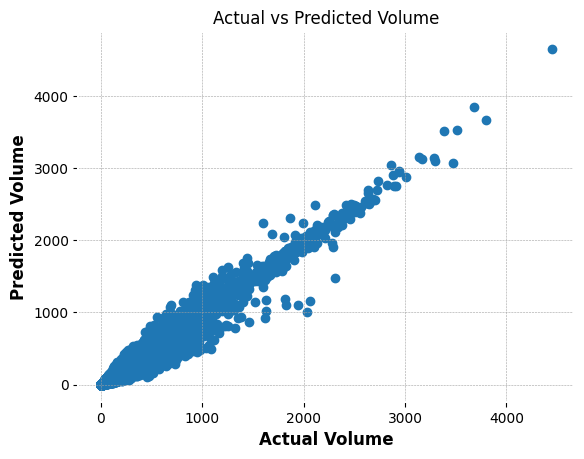

In [73]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Volume')
plt.ylabel('Predicted Volume')
plt.title('Actual vs Predicted Volume')

## Analysis for each day

In [234]:
#split timestamp into date and time
df['date'] = [d.date() for d in df.index]
df['time'] = [d.time() for d in df.index]


In [235]:
df.reset_index(drop=False, inplace=True)
df.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,date,time
0,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,7564.906851,3,0.075183,320.390851,2017-08-17,04:00:00
1,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000,0,0.000000,0.000000,2017-08-17,04:01:00
2,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1117.542921,2,0.261074,1117.542921,2017-08-17,04:02:00
3,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,51.171852,3,0.012008,51.171852,2017-08-17,04:03:00
4,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,599.999338,1,0.140796,599.999338,2017-08-17,04:04:00


In [236]:
df.set_index(['date', 'time'])

timestamp      open      high       low   
date       time                                                         
2017-08-17 04:00:00 2017-08-17 04:00:00   4261.48   4261.48   4261.48  \
           04:01:00 2017-08-17 04:01:00   4261.48   4261.48   4261.48   
           04:02:00 2017-08-17 04:02:00   4280.56   4280.56   4280.56   
           04:03:00 2017-08-17 04:03:00   4261.48   4261.48   4261.48   
           04:04:00 2017-08-17 04:04:00   4261.48   4261.48   4261.48   
...                                 ...       ...       ...       ...   
2023-08-01 13:15:00 2023-08-01 13:15:00  28896.00  28907.42  28893.03   
           13:16:00 2023-08-01 13:16:00  28907.41  28912.74  28907.41   
           13:17:00 2023-08-01 13:17:00  28908.52  28908.53  28902.48   
           13:18:00 2023-08-01 13:18:00  28902.48  28902.49  28902.48   
           13:19:00 2023-08-01 13:19:00  28902.48  28902.49  28902.48   

                        close     volume  quote_asset_volume   
date       time                                                
2017-08-17 04:00:00   4261.48   1.775183        7.564907e+03  \
           04:01:00   4261.48   0.000000        0.000000e+00   
           04:02:00   4280.56   0.261074        1.117543e+03   
           04:03:00   4261.48   0.012008        5.117185e+01   
           04:04:00   4261.48   0.140796        5.999993e+02   
...                       ...        ...                 ...   
2023-08-01 13:15:00  28907.41  37.746570        1.090761e+06   
           13:16:00  28908.53  15.896100        4.595556e+05   
           13:17:00  28902.49  11.522630        3.330532e+05   
           13:18:00  28902.49   4.775890        1.380351e+05   
           13:19:00  28902.49   4.686580        1.354538e+05   

                     number_of_trades  taker_buy_base_asset_volume   
date       time                                                      
2017-08-17 04:00:00                 3                     0.075183  \
           04:01:00                 0                     0.000000   
           04:02:00                 2                     0.261074   
           04:03:00                 3                     0.012008   
           04:04:00                 1                     0.140796   
...                               ...                          ...   
2023-08-01 13:15:00               686                    16.504520   
           13:16:00               483                    10.229810   
           13:17:00               451                     2.708730   
           13:18:00               317                     2.245460   
           13:19:00               258                     0.893910   

                     taker_buy_quote_asset_volume  
date       time                                    
2017-08-17 04:00:00                    320.390851  
           04:01:00                      0.000000  
           04:02:00                   1117.542921  
           04:03:00                     51.171852  
           04:04:00                    599.999338  
...                                           ...  
2023-08-01 13:15:00                 476955.246611  
           13:16:00                 295738.166916  
           13:17:00                  78290.170121  
           13:18:00                  64899.385195  
           13:19:00                  25836.224836  

[3126000 rows x 10 columns]

## Choose a date to display
Plot the price

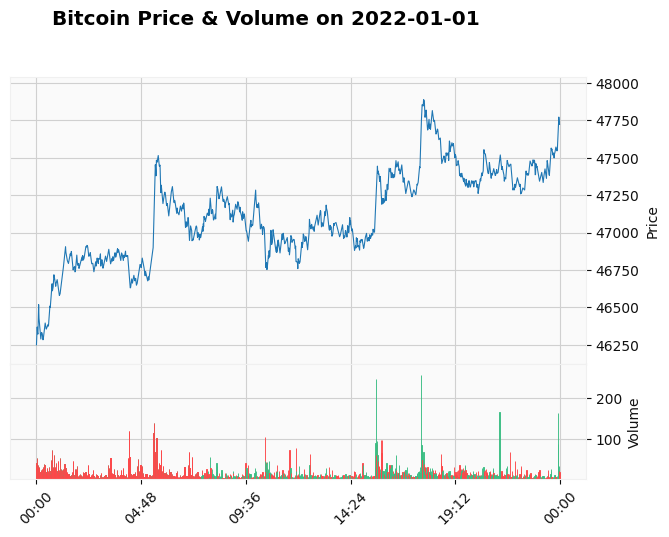

In [245]:
user_date = input('Enter a date (yyyy-mm-dd): ')
user_date = datetime.datetime.strptime(user_date, '%Y-%m-%d').date()

data = df.loc[df['date'] == user_date]
data = data.set_index('timestamp')

plot = mpf.plot(data, type='line', volume=True, mav = 60,  show_nontrading=True, title='Bitcoin Price & Volume on ' + str(user_date), style='yahoo')

Statistics for the day

In [254]:
user_date = input('Enter a date (yyyy-mm-dd): ')
user_date = datetime.datetime.strptime(user_date, '%Y-%m-%d').date()

data = df.loc[df['date'] == user_date]

summary = data.describe()
summary = summary.drop(['timestamp'], axis = 1)
summary = summary.astype(int)
summary

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
count,1893,1893,1893,1893,1893,1893,1893,1893,1893
mean,47053,47074,47034,47054,13,653602,492,7,330821
min,46216,46271,46208,46250,1,71546,195,0,18893
25%,46823,46842,46809,46824,5,253763,333,2,111844
50%,47026,47044,47008,47027,8,419021,414,4,193855
75%,47304,47323,47284,47304,15,724893,544,7,365177
max,47887,47954,47854,47887,257,12278362,5942,172,8220776
std,309,311,308,309,17,810508,329,10,498256


## Calculate volatility